In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow

pd.options.mode.chained_assignment = None

# Import Data

In [41]:
# Import the data
df = pd.read_csv("../clean_data.csv", low_memory=False)


In [42]:
# View column names and drop unnecesary columns for the model 
df.columns


Index(['id', 'expid', 'membid', 'myear', 'sex', 'calcage', 'citizen', 'status',
       'msolo', 'msuccess', 'msmtdate1', 'msmtdate2', 'msmtdate3', 'route1',
       'route2', 'route3', 'route4', 'mo2used', 'mo2none', 'mo2climb',
       'mo2descent', 'mo2sleep', 'death', 'deathdate', 'msmtbid', 'stdrte',
       'new_route', 'new_status', 'climber_count'],
      dtype='object')

# Feature Selection

In [43]:
# Set features
feature_names = ['sex', 'calcage', 'citizen', 'new_route', 'mo2used', 'mo2climb',
                 'mo2descent', 'mo2sleep', 'stdrte', 'new_status']

X = df[feature_names]

In [44]:
# Convert X values to numerical 

###                KEY                  ### 
###        Male = 0, Female = 1         ###
###        True = 1, False = 0          ### 
###  Citizen and Route = see label map  ###

X.replace(True, 1, inplace=True)
X['sex'] = pd.get_dummies(X['sex'])

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()

# Perform label transformation and create label maps for later use 
X['citizen'] = le.fit_transform(X['citizen'])
country_label_map = dict(zip(le.classes_, le.transform(le.classes_)))
X['new_route'] = le.fit_transform(X['new_route'])
route_label_map = dict(zip(le.classes_, le.transform(le.classes_)))
X['new_status'] = le.fit_transform(X['new_status'])
status_label_map = dict(zip(le.classes_, le.transform(le.classes_)))

X

sex  calcage  citizen  new_route  mo2used  mo2climb  mo2descent  \
0        0       49       15          2      0.0       0.0         0.0   
1        1       30       89          2      0.0       0.0         0.0   
2        0       32       15          2      1.0       1.0         0.0   
3        0       40       85          2      0.0       0.0         0.0   
4        0       29       85          2      1.0       1.0         0.0   
...    ...      ...      ...        ...      ...       ...         ...   
21693    0       47       28          0      1.0       1.0         0.0   
21694    0       37       28          0      1.0       1.0         0.0   
21695    0       57       28          0      1.0       1.0         0.0   
21696    0       35       28          0      1.0       1.0         0.0   
21697    0       37       28          0      1.0       1.0         0.0   

       mo2sleep  stdrte  new_status  
0           0.0     1.0           3  
1           0.0     1.0           3  
2           1.0     1.0           0  
3           0.0     1.0           5  
4           1.0     1.0           5  
...         ...     ...         ...  
21693       0.0     1.0           0  
21694       1.0     1.0           0  
21695       1.0     1.0           0  
21696       1.0     1.0           0  
21697       1.0     1.0           0  

[21698 rows x 10 columns]

# Target Selection

In [45]:
target_names = df['msuccess'].unique()
target_names


array([False,  True])

In [46]:
y  = df['msuccess']

# Create a Train Test Split


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [48]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Create the scaler
X_scaler = MinMaxScaler().fit(X_train)

# Transform the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [68]:
# Save the scaler for later use
import joblib 

filename = 'data_scaler.pkl'
joblib.dump(X_scaler, filename) 

['data_scaler.pkl']

In [49]:
# Convert the y values to numerical using label_encoder/to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)
y_test_categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

# Train the Model



In [50]:
# Create and initial trial model and add layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

inputs = X_train.shape[1]

model = Sequential()
model.add(Dense(units=60, activation='relu', input_dim=inputs))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))


In [51]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 60)                660       
_________________________________________________________________
dense_4 (Dense)              (None, 200)               12200     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 402       
Total params: 13,262
Trainable params: 13,262
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2,
    )

Epoch 1/100
509/509 - 1s - loss: 0.3472 - accuracy: 0.8695
Epoch 2/100
509/509 - 0s - loss: 0.3225 - accuracy: 0.8750
Epoch 3/100
509/509 - 0s - loss: 0.3206 - accuracy: 0.8759
Epoch 4/100
509/509 - 0s - loss: 0.3206 - accuracy: 0.8755
Epoch 5/100
509/509 - 0s - loss: 0.3205 - accuracy: 0.8756
Epoch 6/100
509/509 - 0s - loss: 0.3190 - accuracy: 0.8760
Epoch 7/100
509/509 - 0s - loss: 0.3191 - accuracy: 0.8760
Epoch 8/100
509/509 - 0s - loss: 0.3187 - accuracy: 0.8758
Epoch 9/100
509/509 - 0s - loss: 0.3185 - accuracy: 0.8765
Epoch 10/100
509/509 - 0s - loss: 0.3179 - accuracy: 0.8769
Epoch 11/100
509/509 - 0s - loss: 0.3179 - accuracy: 0.8763
Epoch 12/100
509/509 - 0s - loss: 0.3171 - accuracy: 0.8764
Epoch 13/100
509/509 - 0s - loss: 0.3177 - accuracy: 0.8764
Epoch 14/100
509/509 - 0s - loss: 0.3165 - accuracy: 0.8770
Epoch 15/100
509/509 - 0s - loss: 0.3164 - accuracy: 0.8765
Epoch 16/100
509/509 - 0s - loss: 0.3162 - accuracy: 0.8762
Epoch 17/100
509/509 - 0s - loss: 0.3160 - accura

# Quantify Model


In [54]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Neural Network Performace - Loss: {model_loss}, Accuracy: {model_accuracy}")

170/170 - 0s - loss: 0.3167 - accuracy: 0.8765
Neural Network Performace - Loss: 0.3166704475879669, Accuracy: 0.8764976859092712


In [55]:
# Print some test data to try out the preduction model 
test_values = X_train_scaled[50].tolist()
result = model.predict([test_values])
print(f"Chance of success for datapoint 50 is: {round(result[0][1]*100,2)}%")


Chance of success for datapoint 50 is: 93.46%


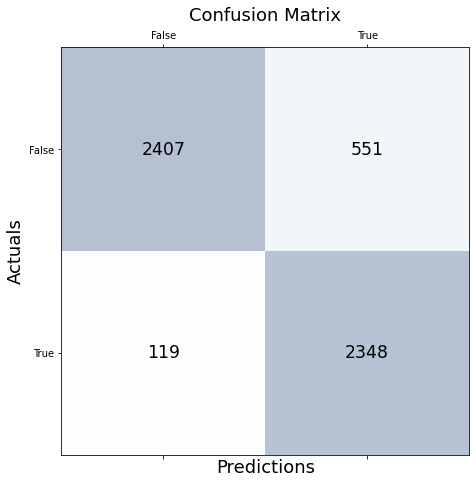

In [56]:
# Create a confusion matrix to visualise the performance 
from sklearn.metrics import confusion_matrix

predictions = np.argmax(model.predict(X_test_scaled), axis=-1)

conf_matrix = confusion_matrix(y_true=encoded_y_test, y_pred=predictions)

fig, ax = plt.subplots(figsize=(7.5, 7.5))

ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predictions', fontsize=18)
ax.set_xticks([0,1])
ax.set_xticklabels(target_names)
plt.ylabel('Actuals', fontsize=18)
ax.set_yticks([0,1])
ax.set_yticklabels(target_names)

plt.show()

In [57]:
# Use recursive feature elimination to identify the best performing features
from sklearn.feature_selection import RFECV
# from sklearn.linear_model import LinearRegression
from sklearn import tree


# Initiate RFE cross-validation and fit with a linear regression model
rfecv = RFECV(
    estimator=tree.DecisionTreeClassifier(),
    min_features_to_select=8,
    step=5,
    n_jobs=-1,
    scoring="r2",
    cv=5,
)

_ = rfecv.fit(X_train_scaled, encoded_y_train)

# Print the best columns
X_train.columns[rfecv.support_]



Index(['sex', 'calcage', 'citizen', 'new_route', 'mo2climb', 'mo2sleep',
       'stdrte', 'new_status'],
      dtype='object')

In [58]:
### RFE Suggests keeping all features


# Hyperperameter tuning

#### Talos Custom Hyperparameter Optimiser for Keras, Tensorflow used 
Availble from: <a href="https://github.com/autonomio/talos/">https://github.com/autonomio/talos/</a>
<img src="https://raw.githubusercontent.com/autonomio/talos/master/logo.png">

In [59]:
import talos

# Function to run the model 
def everest(x_train, y_train, x_val, y_val, params):
    model = Sequential()
    model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1], 
              activation=params['activation']))
 
    model.add(Dropout(params['dropout']))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=params['optimizer'], metrics=['accuracy'])
    
    out = model.fit(x_train, 
                    y_train,
                    validation_data=(x_val, y_val),
                    epochs=params['epochs'],
                    batch_size=params['batch_size'],
                    verbose=0)
    
    return out, model

In [60]:
# Create a parameter dictionary
p = {'first_neuron':[30,60,120,240],
    'hidden_layers':[1, 2],
    'batch_size': [10,20, 30],
    'epochs': [100, 150, 200],
    'dropout': [0],
    'optimizer': ['Nadam', 'Adam'],
    'losses': ['binary_crossentropy'],
    'activation':['relu'],
    'last_activation': ['sigmoid']}

In [61]:
t = talos.Scan(x=X_train_scaled, y=encoded_y_train, params=p, model=everest, experiment_name='everest_tune', round_limit=30)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [39:42<00:00, 79.43s/it]


In [62]:
t.details

experiment_name            everest_tune
random_method          uniform_mersenne
reduction_method                   None
reduction_interval                   50
reduction_window                     20
reduction_threshold                 0.2
reduction_metric                val_acc
complete_time            08/25/21/08:56
x_shape                     (16273, 10)
y_shape                        (16273,)
dtype: object

### Best parameters:  
  
(as per table below)  
first layer: 30  
hidden layers: 2  
activation: relu  
batch_size: 20  
epochs: 150  
dropout: 0  
optimizer: Nadam  
<b>accuracy (val):</b> 88.017%  
<b>loss (val):</b> 0.316674


In [63]:
# Display a dataframe comapring the results of the different combinations 
t.data

start              end    duration  round_epochs      loss  \
0   08/25/21-081651  08/25/21-081924  153.606198           200  0.302781   
1   08/25/21-081924  08/25/21-082120  115.259690           150  0.307944   
2   08/25/21-082120  08/25/21-082243   83.275903           200  0.311683   
3   08/25/21-082243  08/25/21-082325   41.615116           100  0.307395   
4   08/25/21-082325  08/25/21-082353   28.441410           100  0.313880   
5   08/25/21-082353  08/25/21-082632  158.117142           200  0.307058   
6   08/25/21-082632  08/25/21-082733   61.686494           150  0.305680   
7   08/25/21-082734  08/25/21-082835   61.670819           150  0.306027   
8   08/25/21-082835  08/25/21-082936   60.803183           150  0.312962   
9   08/25/21-082936  08/25/21-083032   55.865111           200  0.312666   
10  08/25/21-083032  08/25/21-083154   81.296361           100  0.306936   
11  08/25/21-083154  08/25/21-083354  120.304415           150  0.302856   
12  08/25/21-083354  08/25/21-083558  123.467238           150  0.311082   
13  08/25/21-083558  08/25/21-083725   86.902818           100  0.312621   
14  08/25/21-083725  08/25/21-083755   30.724834           100  0.310513   
15  08/25/21-083756  08/25/21-083845   49.236881           150  0.305724   
16  08/25/21-083845  08/25/21-083918   32.736044           100  0.316053   
17  08/25/21-083918  08/25/21-084136  138.183115           150  0.309381   
18  08/25/21-084136  08/25/21-084310   93.361112           200  0.307676   
19  08/25/21-084310  08/25/21-084341   31.254015           100  0.315771   
20  08/25/21-084341  08/25/21-084428   47.146175           150  0.306852   
21  08/25/21-084428  08/25/21-084551   82.704441           100  0.313937   
22  08/25/21-084551  08/25/21-084802  131.106751           150  0.305015   
23  08/25/21-084803  08/25/21-084851   48.854972           150  0.311012   
24  08/25/21-084852  08/25/21-084941   49.755342           150  0.312719   
25  08/25/21-084941  08/25/21-085015   33.096976           100  0.315129   
26  08/25/21-085015  08/25/21-085103   48.178424           100  0.309661   
27  08/25/21-085103  08/25/21-085408  185.516495           200  0.302791   
28  08/25/21-085409  08/25/21-085515   66.790987           200  0.301973   
29  08/25/21-085516  08/25/21-085633   77.832502           200  0.300183   

    accuracy  val_loss  val_accuracy activation  batch_size  dropout  epochs  \
0   0.880432  0.321978      0.874642       relu          10        0     200   
1   0.877447  0.318839      0.875871       relu          10        0     150   
2   0.876306  0.320095      0.878533       relu          20        0     200   
3   0.878852  0.321459      0.875051       relu          20        0     100   
4   0.876569  0.316681      0.877509       relu          30        0     100   
5   0.876920  0.319329      0.876690       relu          10        0     200   
6   0.879203  0.320330      0.877100       relu          20        0     150   
7   0.878588  0.322367      0.876690       relu          20        0     150   
8   0.876218  0.316674      0.880172       relu          20        0     150   
9   0.876920  0.317853      0.878943       relu          30        0     200   
10  0.878413  0.318524      0.877304       relu          10        0     100   
11  0.881749  0.326593      0.873822       relu          10        0     150   
12  0.875165  0.318217      0.878329       relu          10        0     150   
13  0.876833  0.317319      0.875666       relu          10        0     100   
14  0.877798  0.317304      0.877304       relu          30        0     100   
15  0.879203  0.321165      0.875256       relu          30        0     150   
16  0.875691  0.316559      0.877304       relu          30        0     100   
17  0.877886  0.320149      0.876280       relu          10        0     150   
18  0.879027  0.321272      0.874232       relu          20        0     200   
19  0.876130  0.317192      0.877509       relu          

# Re-Training 

In [69]:
# Retrain the model with the optimised paramaters 

p_optimisied = {'first_neuron':30,
                'second_neuron':200,
                'hidden_layers':2,
                'batch_size': 20,
                'epochs': 150,
                'dropout': 0,
                'optimizer': 'Nadam',
                'activation':'relu',
               }

def everest_optimised(x_train, y_train, params):
    model = Sequential()
    model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1], 
              activation=params['activation']))
    
    model.add(Dense(params['second_neuron'], activation=params['activation']))
 
    model.add(Dropout(params['dropout']))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=params['optimizer'], metrics=['accuracy'])
    
    out = model.fit(x_train, 
                    y_train,
                    epochs=params['epochs'],
                    batch_size=params['batch_size'],
                    verbose=0)

    return out, model


In [70]:
# Re-fit the training data to the model
out, model = everest_optimised(X_train_scaled, encoded_y_train, p_optimisied)

In [71]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, encoded_y_test, verbose=2)
print(f"Neural Network Performace - Loss: {model_loss}, Accuracy: {model_accuracy}")

170/170 - 0s - loss: 0.3169 - accuracy: 0.8782
Neural Network Performace - Loss: 0.31689390540122986, Accuracy: 0.8781566619873047


# Save the Model

In [72]:
# Save the model
filename = 'success_model.h5'
model.save(filename)

# Load the Model

In [14]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model("success_model.h5")